In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv')
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1,NaN,S


In [3]:
df = df[['Survived','Age','Fare']]

In [4]:
df.sample()

,Survived,Age,Fare
606,0,30.0,7.8958


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                 random_state=42)

X_train.shape,X_test.shape

((712, 2), (179, 2))

In [9]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [10]:
def plotFunction(colName):
    sns.displot(X_train[colName],kde='true')
    plt.title(f"{colName} Probability Density Function")
    
    plt.figure(figsize=(12,5))
    plt.subplot(111)
    stats.probplot(X_train[colName], dist="norm", plot=plt)
    plt.title(f"{colName} QQ Plot")
    
    plt.show()

In [11]:
def TransformAndPlotFunction(transform,colName):
    X_train_colName = X_train[[colName]]
    trf = ColumnTransformer([
        ('trf1',FunctionTransformer(transform),[colName])
    ],remainder='passthrough')
    X_train_colName_trans = trf.fit_transform(X_train_colName)
    sns.displot(X_train_colName_trans,kde='true')
    plt.title(f"{colName} Probability Density Function After transform")

    # print(X_train_colName_trans[:,0])
    plt.figure(figsize=(12,5))
    plt.subplot(111)
    stats.probplot(X_train_colName_trans[:,0], plot=plt)
    plt.title(f"{colName} QQ Plot After transform")
    
    plt.show()
    

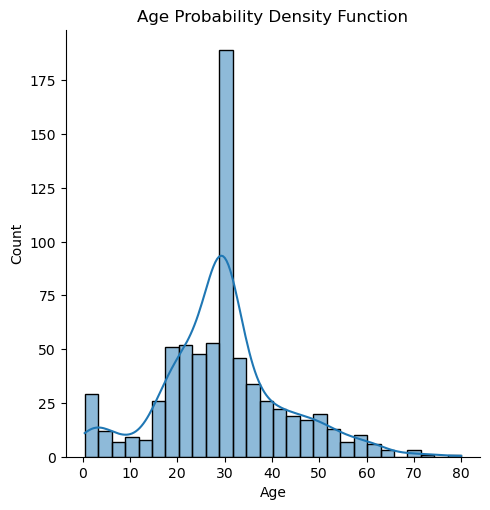

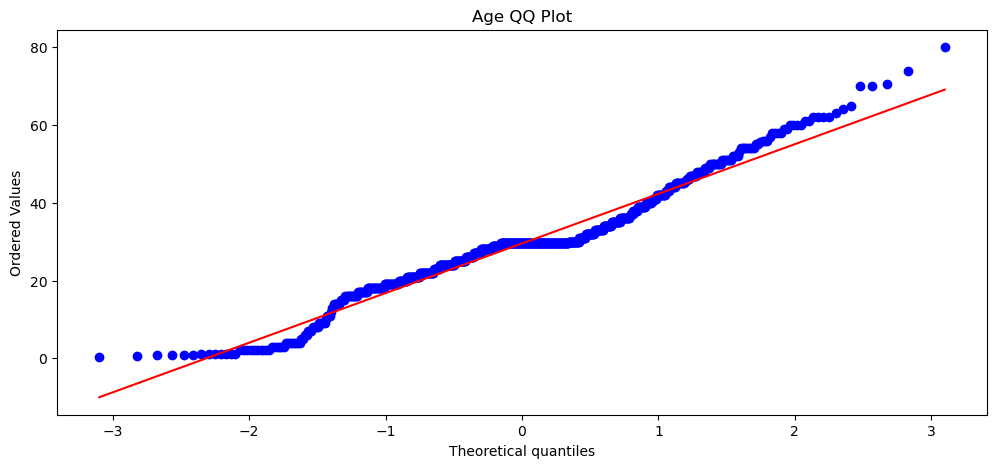

In [12]:
plotFunction('Age')

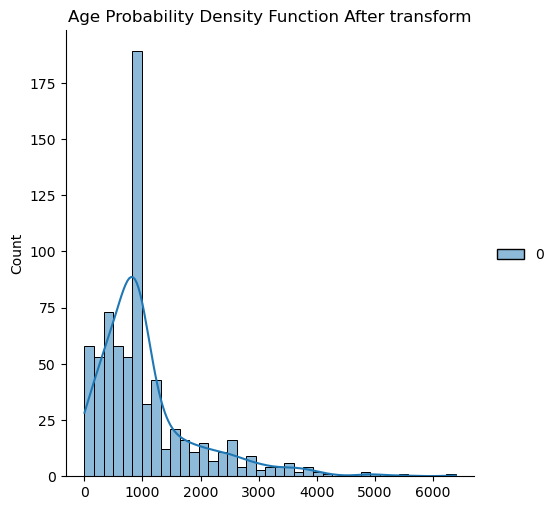

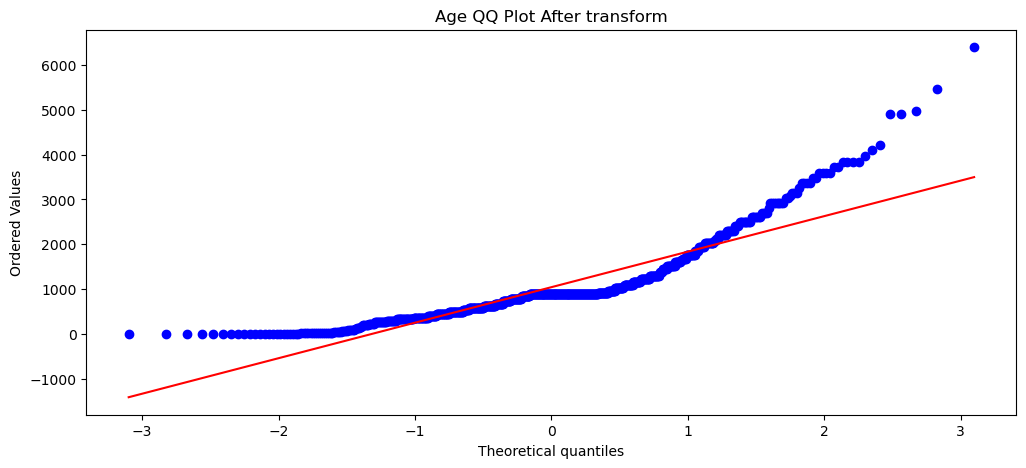

In [15]:
TransformAndPlotFunction(lambda x : x*x,'Age')

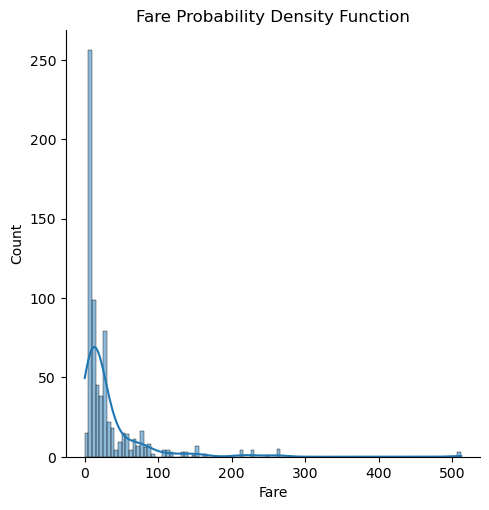

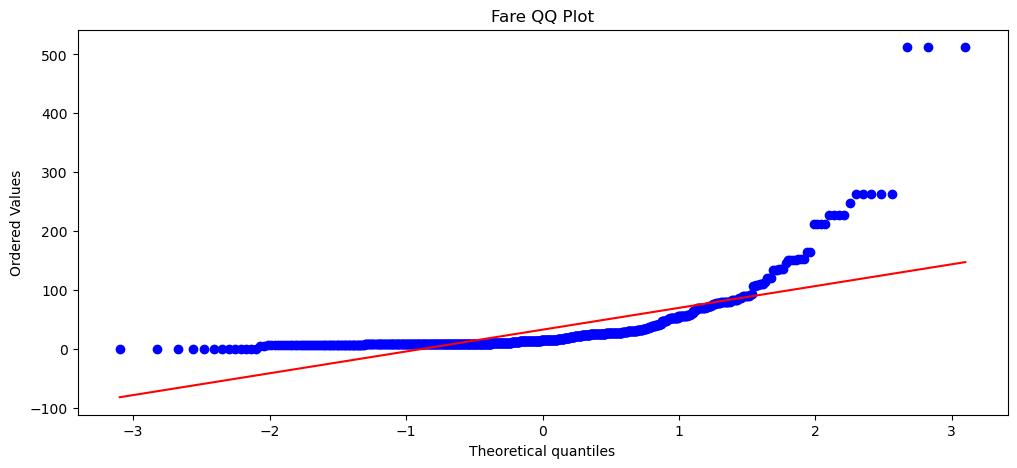

In [16]:
plotFunction('Fare')

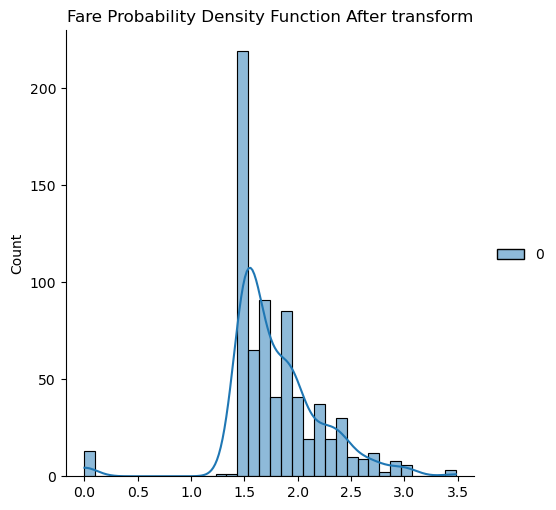

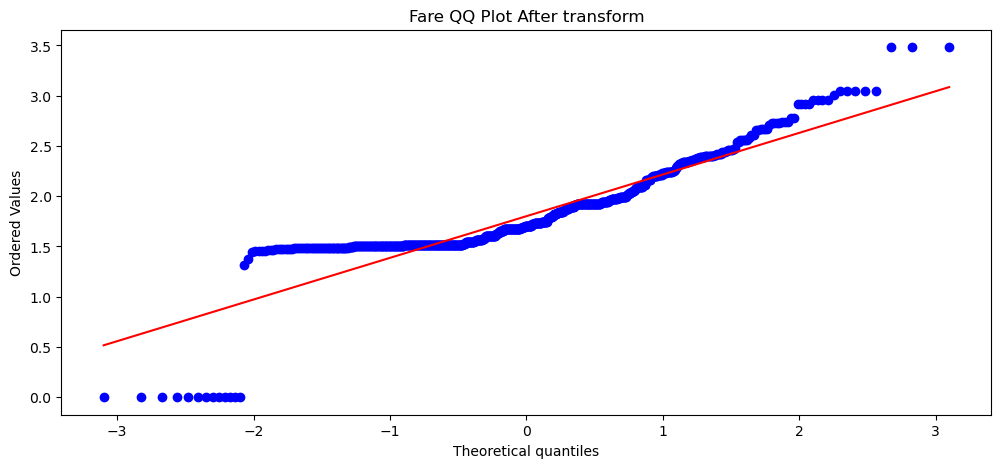

In [24]:
TransformAndPlotFunction(lambda x : x**(1/5),'Fare')

In [25]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
def AccuracyScore():
    clf.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    y_pred2 = clf2.predict(X_test)
    
    print("Accuracy LR",accuracy_score(y_test,y_pred))
    print("Accuracy DT",accuracy_score(y_test,y_pred2))

In [31]:
def TransformAccuracyScore(transform1,colName1,transform2,colName2):
    trf = ColumnTransformer([
        ('trf1',FunctionTransformer(transform1),[colName1]),
        ('trf2',FunctionTransformer(transform2),[colName2])
    ],remainder='passthrough')

    X_train_trans = trf.fit_transform(X_train)
    X_test_trans = trf.transform(X_test)
    clf.fit(X_train_trans,y_train)
    clf2.fit(X_train_trans,y_train)
    
    y_pred = clf.predict(X_test_trans)
    y_pred2 = clf2.predict(X_test_trans)
    
    print("Accuracy LR",accuracy_score(y_test,y_pred))
    print("Accuracy DT",accuracy_score(y_test,y_pred2))  

In [32]:
AccuracyScore()

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [64]:
TransformAccuracyScore(lambda x : x**(1/5),'Fare',lambda x : 1/x,'Age')

Accuracy LR 0.6927374301675978
Accuracy DT 0.6815642458100558
